# Project Milestone 2 : Cleaning/Formatting Flat File Source
## DSC540
### Astrid Fuentes

Perform at least 5 data transformation and/or cleansing steps to your flat file data. For example:

1. Replace Headers
2. Format data into a more readable format
3. Identify outliers and bad data
4. Find duplicates
5. Fix casing or inconsistent values
6. Conduct Fuzzy Matching

In [353]:
# Define the libraries
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [354]:
path="/Users/astrid/Documents/GitHub/Data-Wrangling-with-Python/DS540/Project"
os.chdir(path)


In [355]:
os.getcwd()

'/Users/astrid/Documents/GitHub/Data-Wrangling-with-Python/DS540/Project'

In [356]:
# Read the visit_data csv file using pandas' read_csv function
df = pd.read_csv("covid19.csv")

In [357]:
df.head()

,Data as of,Start Date,End Date,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,All Ages,347131.0,3329907.0,331354.0,161474.0,8726.0,524629.0,NaN
1,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,Under 1 year,39.0,18436.0,193.0,6.0,21.0,247.0,NaN
2,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,0-17 years,165.0,32453.0,536.0,29.0,175.0,847.0,NaN
3,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,1-4 years,21.0,3388.0,120.0,3.0,59.0,197.0,NaN
4,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,5-14 years,58.0,5440.0,153.0,11.0,74.0,274.0,NaN


## Rename columns

In [358]:
# Rename columns
df= df.rename(columns = {'Data as of': 'date_pulled','Start Date': 'start_date', 'End Date': 'end_date', 
                         'State': 'state', 'Sex': 'gender', 'Age group':'age_group',
                         'COVID-19 Deaths': 'covid19_deaths',
                         'Total Deaths': 'total_deaths', 'Pneumonia Deaths': 'pneumonia_deaths', 
                         'Pneumonia and COVID-19 Deaths': 'pneumonia_and_covid19_deaths', 
                         'Influenza Deaths': 'influenza_deaths', 
                         'Pneumonia, Influenza, or COVID-19 Deaths': 'pneumonia_influenza_covid19_deaths',
                         'Footnote': 'footnote'}, inplace = False)

In [359]:
# See changes in column names
df.head()

,date_pulled,start_date,end_date,state,gender,age_group,covid19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid19_deaths,influenza_deaths,pneumonia_influenza_covid19_deaths,footnote
0,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,All Ages,347131.0,3329907.0,331354.0,161474.0,8726.0,524629.0,NaN
1,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,Under 1 year,39.0,18436.0,193.0,6.0,21.0,247.0,NaN
2,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,0-17 years,165.0,32453.0,536.0,29.0,175.0,847.0,NaN
3,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,1-4 years,21.0,3388.0,120.0,3.0,59.0,197.0,NaN
4,01/21/2021,01/01/2020,01/16/2021,United States,All Sexes,5-14 years,58.0,5440.0,153.0,11.0,74.0,274.0,NaN


In [360]:
# Get column names to be used later
col=df.columns.tolist()
print(col)

['date_pulled', 'start_date', 'end_date', 'state', 'gender', 'age_group', 'covid19_deaths', 'total_deaths', 'pneumonia_deaths', 'pneumonia_and_covid19_deaths', 'influenza_deaths', 'pneumonia_influenza_covid19_deaths', 'footnote']


## Check for Nulls

In [361]:
## Rename columns# Check to see if there are nulls in any record in the data frame
check_nan_in_df = df.isnull().values.any()
print (check_nan_in_df)

True


In [362]:
# Check for null values using isnull()
print("The column date_pulled contains NaN - %s " % df.date_pulled.isnull().values.any())
print("The column start_date contains NaN - %s " % df.start_date.isnull().values.any())
print("The column end_date contains NaN - %s " % df.end_date.isnull().values.any())
print("The column state contains NaN - %s " % df.state.isnull().values.any())
print("The column gender contains NaN - %s " % df.gender.isnull().values.any())
print("The column age_group contains NaN - %s " % df.age_group.isnull().values.any())
print("The column covid19_deaths contains NaN - %s " % df.covid19_deaths.isnull().values.any())
print("The column total_deaths contains NaN - %s " % df.total_deaths.isnull().values.any())
print("The column pneumonia_deaths contains NaN - %s " % df.pneumonia_deaths.isnull().values.any())
print("The column pneumonia_and_covid19_deaths contains NaN - %s " % df.pneumonia_and_covid19_deaths.isnull().values.any())
print("The column influenza_deaths contains NaN - %s " % df.influenza_deaths.isnull().values.any())
print("The column pneumonia_influenza_covid19_deaths contains NaN - %s " % df.pneumonia_influenza_covid19_deaths.isnull().values.any())
print("The column footnote contains NaN - %s " % df.footnote.isnull().values.any())

The column date_pulled contains NaN - False 
The column start_date contains NaN - False 
The column end_date contains NaN - False 
The column state contains NaN - False 
The column gender contains NaN - False 
The column age_group contains NaN - False 
The column covid19_deaths contains NaN - True 
The column total_deaths contains NaN - True 
The column pneumonia_deaths contains NaN - True 
The column pneumonia_and_covid19_deaths contains NaN - True 
The column influenza_deaths contains NaN - True 
The column pneumonia_influenza_covid19_deaths contains NaN - True 
The column footnote contains NaN - True 


Several columns contain nulls. I will remove some columns that I'm not interested in, for example "footnote". 
For other columns, like covid19_deaths I will have to treat the NaN differently.

## Check for Duplicates

In [365]:
# To identify duplicates we can use the duplicated() function
print("date_pulled is duplictaed - {}".format(any(df.date_pulled.duplicated())))
print("start_date is duplictaed - {}".format(any(df.start_date.duplicated())))
print("end_date is duplictaed - {}".format(any(df.end_date.duplicated())))
print("state is duplictaed - {}".format(any(df.state.duplicated())))
print("gender is duplictaed - {}".format(any(df.gender.duplicated())))
print("age_group is duplictaed - {}".format(any(df.age_group.duplicated())))
print("covid19_deaths is duplictaed - {}".format(any(df.covid19_deaths.duplicated())))
print("total_deaths is duplictaed - {}".format(any(df.total_deaths.duplicated())))
print("pneumonia_deaths is duplictaed - {}".format(any(df.pneumonia_deaths.duplicated())))
print("pneumonia_and_covid19_deaths is duplictaed - {}".format(any(df.pneumonia_and_covid19_deaths.duplicated())))
print("influenza_deaths is duplictaed - {}".format(any(df.influenza_deaths.duplicated())))
print("pneumonia_influenza_covid19_deaths is duplictaed - {}".format(any(df.pneumonia_influenza_covid19_deaths.duplicated())))
print("footnote is duplictaed - {}".format(any(df.footnote.duplicated())))

date_pulled is duplictaed - True
start_date is duplictaed - True
end_date is duplictaed - True
state is duplictaed - True
gender is duplictaed - True
age_group is duplictaed - True
covid19_deaths is duplictaed - True
total_deaths is duplictaed - True
pneumonia_deaths is duplictaed - True
pneumonia_and_covid19_deaths is duplictaed - True
influenza_deaths is duplictaed - True
pneumonia_influenza_covid19_deaths is duplictaed - True
footnote is duplictaed - True


All columns have duplicates within each column but I do not believe this is a problem at this time. 
Due to the nature of this data, until this is grouped by certain column values, there will be duplicates within the same column.

In [366]:
# To identify duplicates across the whole data set we can use the duplicated() function as follows
check_dups_in_df = df.duplicated().values.any()
print(check_dups_in_df)

False


## Drop columns not needed

In [367]:
# Dro## Check for Nullsp columns we are not interested in
df = df.drop(['date_pulled', 'footnote', 'pneumonia_deaths', 'pneumonia_and_covid19_deaths', 'influenza_deaths', 'pneumonia_influenza_covid19_deaths',], axis=1)

## Drop rows with totals

In [368]:
# We are not interested in the totals where state = United States 
# and gender = 'All Sexes' and age_group = 'All Ages'
# so we will remove those rows
df.drop(df.loc[df['state']=='United States'].index, inplace=True)
df.drop(df.loc[df['gender']=='All Sexes'].index, inplace=True)
df.drop(df.loc[df['age_group']=='All Ages'].index, inplace=True)

In [369]:
df.head()

,start_date,end_date,state,gender,age_group,covid19_deaths,total_deaths
66,01/01/2020,01/16/2021,Alabama,Male,Under 1 year,NaN,205.0
67,01/01/2020,01/16/2021,Alabama,Male,0-17 years,NaN,401.0
68,01/01/2020,01/16/2021,Alabama,Male,1-4 years,0.0,47.0
69,01/01/2020,01/16/2021,Alabama,Male,5-14 years,0.0,71.0
70,01/01/2020,01/16/2021,Alabama,Male,15-24 years,NaN,527.0


## Drop rows were both counts are null

In [370]:
# Drop rows where both covid19_deaths and total_deaths are null since those provide no useful information for us.
df.dropna(subset=['covid19_deaths', 'total_deaths'], how='all',inplace=True)

In [371]:
df.head()

,start_date,end_date,state,gender,age_group,covid19_deaths,total_deaths
66,01/01/2020,01/16/2021,Alabama,Male,Under 1 year,NaN,205.0
67,01/01/2020,01/16/2021,Alabama,Male,0-17 years,NaN,401.0
68,01/01/2020,01/16/2021,Alabama,Male,1-4 years,0.0,47.0
69,01/01/2020,01/16/2021,Alabama,Male,5-14 years,0.0,71.0
70,01/01/2020,01/16/2021,Alabama,Male,15-24 years,NaN,527.0


## Checking for outliers

In [372]:
df.describe()

,covid19_deaths,total_deaths
count,2024.000000,2238.000000
mean,204.389822,1884.806524
std,544.575459,4530.105317
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,186.500000
75%,114.250000,1476.250000
max,4511.000000,60231.000000


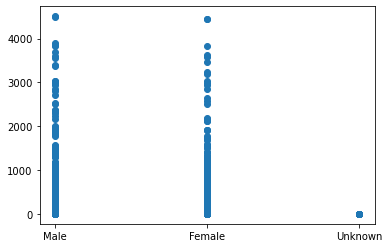

In [373]:
# Perform scatter plot of covid19_deaths per gender to look for potential outliers 
plt.scatter(df.gender, df.covid19_deaths)

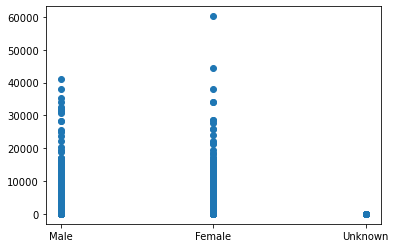

In [374]:
# Perform scatter plot of total_deaths per gender to look for potential outliers 
plt.scatter(df.gender, df.total_deaths)

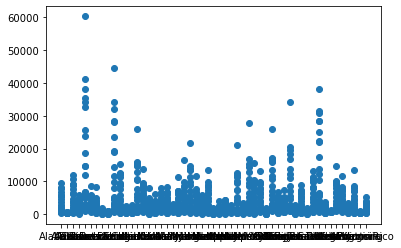

In [419]:
plt.scatter(df.state, df.total_deaths)

## Fill in nulls with zero

In [432]:
# Now we will fill in the reminder NaN's with 0.0. 
# In this case we are assuming that missing values in the counts means no cases were reported or confirmed.
df.fillna(0)

,start_date,end_date,state,gender,age_group,covid19_deaths,total_deaths
71,01/01/2020,01/16/2021,Alabama,Male,18-29 years,18.0,856.0
72,01/01/2020,01/16/2021,Alabama,Male,25-34 years,28.0,915.0
73,01/01/2020,01/16/2021,Alabama,Male,30-49 years,154.0,2787.0
74,01/01/2020,01/16/2021,Alabama,Male,35-44 years,67.0,1318.0
75,01/01/2020,01/16/2021,Alabama,Male,45-54 years,192.0,2369.0
...,...,...,...,...,...,...,...
2640,01/01/2020,01/16/2021,Puerto Rico,Female,50-64 years,114.0,1423.0
2641,01/01/2020,01/16/2021,Puerto Rico,Female,55-64 years,87.0,1112.0
2642,01/01/2020,01/16/2021,Puerto Rico,Female,65-74 years,127.0,2147.0
2643,01/01/2020,01/16/2021,Puerto Rico,Female,75-84 years,160.0,3525.0
